In [1]:
import heapq
import random
import time
import matplotlib.pyplot as plt

GRID_SIZE = 20
OBSTACLE_PROB = 0.25

In [2]:
def generate_grid():
    grid = [[0 if random.random() > OBSTACLE_PROB else 1 for _ in range(GRID_SIZE)] for _ in range(GRID_SIZE)]
    start = (random.randint(0, GRID_SIZE-1), random.randint(0, GRID_SIZE-1))
    goal = (random.randint(0, GRID_SIZE-1), random.randint(0, GRID_SIZE-1))
    grid[start[0]][start[1]] = 0
    grid[goal[0]][goal[1]] = 0
    return grid, start, goal

def manhattan(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def euclidean(a, b):
    return ((a[0] - b[0])**2 + (a[1] - b[1])**2)**0.5

def diagonal(a, b):
    return max(abs(a[0] - b[0]), abs(a[1] - b[1]))


In [3]:

def astar(grid, start, goal, heuristic):
    open_list = []
    heapq.heappush(open_list, (0, start))

    came_from = {}
    cost_so_far = {start: 0}
    nodes_expanded = 0

    while open_list:
        _, current = heapq.heappop(open_list)

        if current == goal:
            break

        nodes_expanded += 1

        for dx, dy in [(1,0), (-1,0), (0,1), (0,-1)]:
            nx, ny = current[0] + dx, current[1] + dy

            if 0 <= nx < GRID_SIZE and 0 <= ny < GRID_SIZE and grid[nx][ny] == 0:
                new_cost = cost_so_far[current] + 1

                if (nx,ny) not in cost_so_far or new_cost < cost_so_far[(nx,ny)]:
                    cost_so_far[(nx,ny)] = new_cost
                    priority = new_cost + heuristic((nx,ny), goal)
                    heapq.heappush(open_list, (priority, (nx,ny)))
                    came_from[(nx,ny)] = current

    return cost_so_far.get(goal, None), nodes_expanded

In [4]:
def run_experiments(runs=20):
    results = {"Manhattan": [], "Euclidean": [], "Diagonal": []}

    for _ in range(runs):
        grid, start, goal = generate_grid()

        for name, h in [("Manhattan", manhattan), ("Euclidean", euclidean), ("Diagonal", diagonal)]:
            start_time = time.time()
            cost, expanded = astar(grid, start, goal, h)
            runtime = (time.time() - start_time) * 1000
            if cost:
                results[name].append((cost, expanded, runtime))
    return results

results = run_experiments(30)

avg = {}
for k,v in results.items():
    avg[k] = {
        "path_cost": sum(x[0] for x in v)/len(v),
        "nodes_expanded": sum(x[1] for x in v)/len(v),
        "runtime": sum(x[2] for x in v)/len(v)
    }

print(avg)


{'Manhattan': {'path_cost': 14.586206896551724, 'nodes_expanded': 37.13793103448276, 'runtime': 0.062383454421470905}, 'Euclidean': {'path_cost': 14.586206896551724, 'nodes_expanded': 52.827586206896555, 'runtime': 0.0906072813889076}, 'Diagonal': {'path_cost': 14.586206896551724, 'nodes_expanded': 61.10344827586207, 'runtime': 0.10118813350282867}}


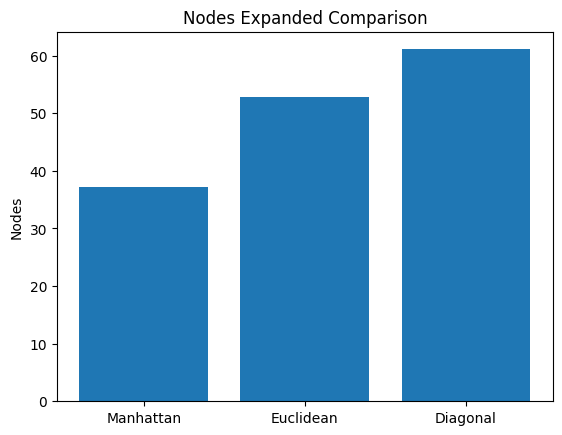

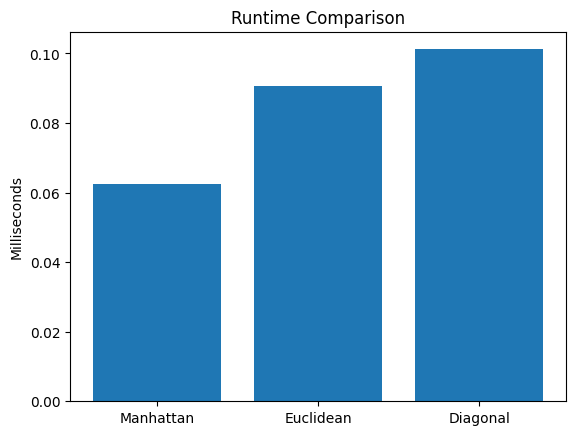

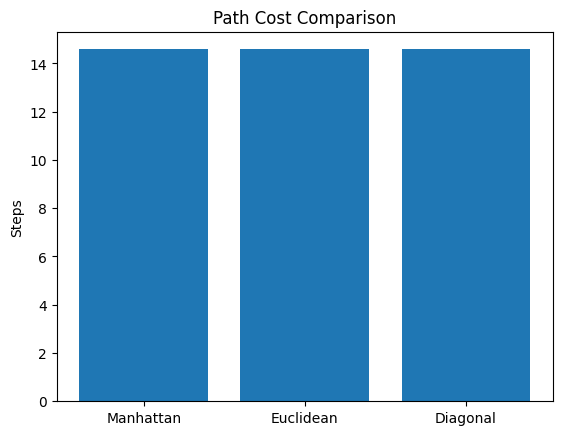

In [5]:
labels = list(avg.keys())
costs = [avg[k]["path_cost"] for k in labels]
nodes = [avg[k]["nodes_expanded"] for k in labels]
runtimes = [avg[k]["runtime"] for k in labels]

# Nodes Expanded
plt.figure()
plt.bar(labels, nodes)
plt.title("Nodes Expanded Comparison")
plt.ylabel("Nodes")

# Runtime
plt.figure()
plt.bar(labels, runtimes)
plt.title("Runtime Comparison")
plt.ylabel("Milliseconds")

# Path Cost
plt.figure()
plt.bar(labels, costs)
plt.title("Path Cost Comparison")
plt.ylabel("Steps")
plt.show()